In [1]:
import sys
sys.path.append('../decision-trees/python/')

import decision_trees
import objective_functions
import utils

import code

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

In [84]:
N_BINS = 201
FIGSIZE = (16,8)

### Generate some random class distributions

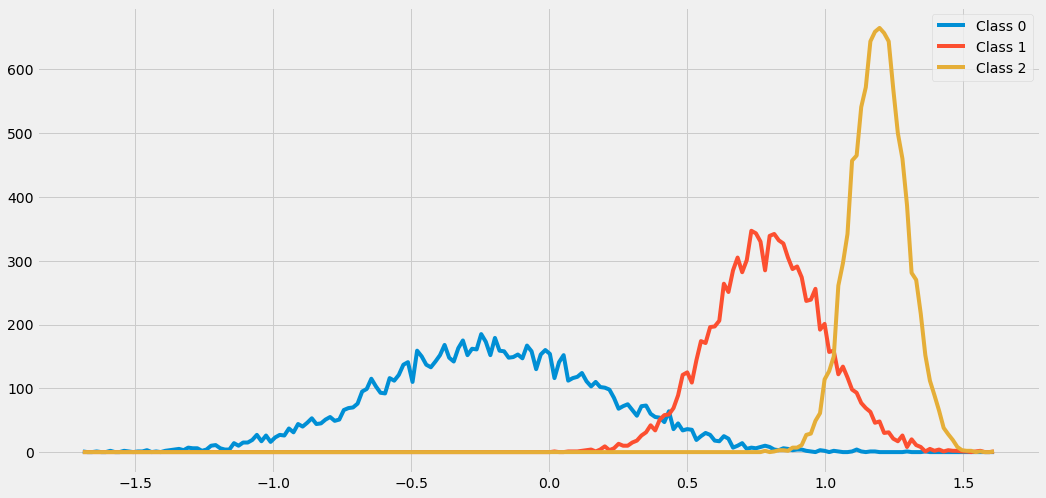

In [85]:
means  = [-0.2, 0.8, 1.2]
sigmas = [0.4, 0.2, 0.1]
points = [10000, 10000, 10000]


X = []
for mean, sigma, n in zip(means, sigmas, points):
    X.append(np.random.normal(mean, sigma, n))

BINS = np.linspace(np.concatenate(X).min(), np.concatenate(X).max(), N_BINS)
    
fig, ax = plt.subplots(figsize=FIGSIZE)
for i, x in enumerate(X):
    hist, bin_edges = np.histogram(x, bins=BINS)
    plt.plot(bin_edges[:-1], hist, label=f"Class {i}")
plt.legend()

### Make this into a two class problem

In [86]:
x_1 = X[1]
x_0 = np.concatenate((X[0], X[2]))

x = np.concatenate((x_0, x_1))
y = np.concatenate((np.zeros(x_0.shape), np.ones(x_1.shape)))

In [87]:
set(y)

{0.0, 1.0}

Text(0, 0.5, 'Instances in bucket')

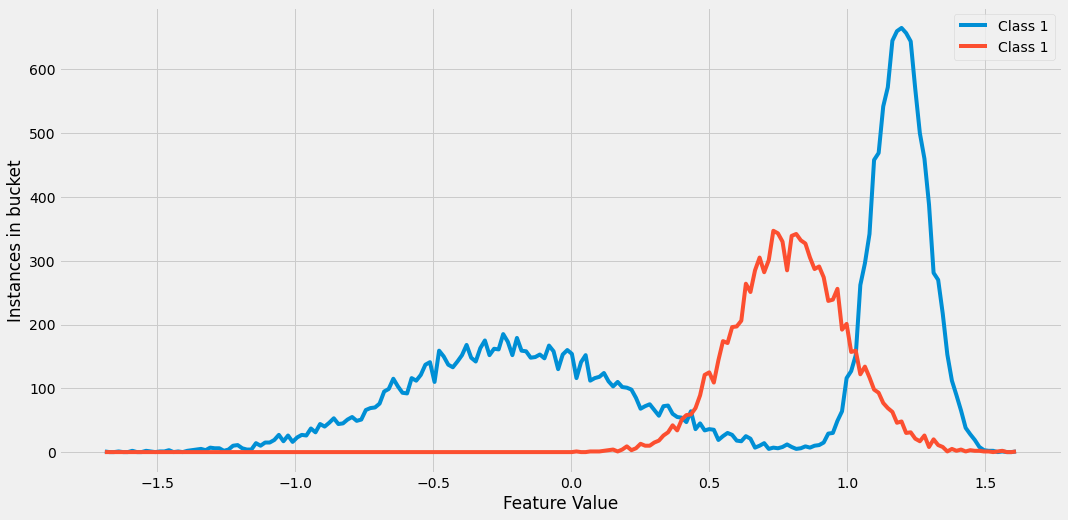

In [88]:
fig, ax = plt.subplots(figsize=(FIGSIZE))
hist, bin_edges = np.histogram(x_0, bins=BINS)
plt.plot(bin_edges[:-1], hist, label=f"Class {class_:.0f}")

hist, bin_edges = np.histogram(x_1, bins=BINS)
plt.plot(bin_edges[:-1], hist, label=f"Class {class_:.0f}")

plt.legend()
ax.set_xlabel('Feature Value')
ax.set_ylabel('Instances in bucket')

Text(0, 0.5, 'Instances in bucket')

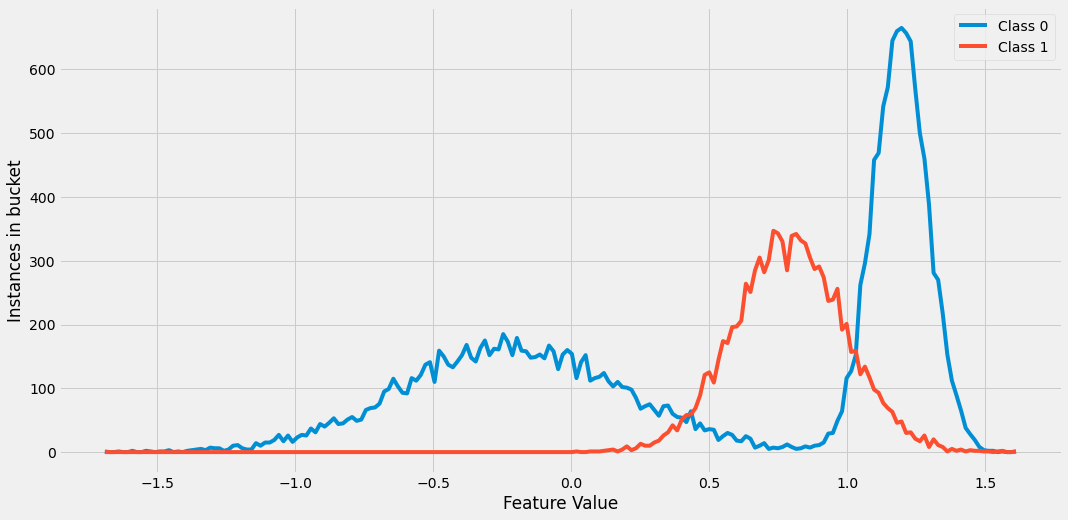

In [89]:
fig, ax = plt.subplots(figsize=(FIGSIZE))
for class_ in sorted(set(y)):
    hist, bin_edges = np.histogram(x[y == class_], bins=BINS)
    plt.plot(bin_edges[:-1], hist, label=f"Class {class_:.0f}")
plt.legend()
ax.set_xlabel('Feature Value')
ax.set_ylabel('Instances in bucket')

In [90]:
splits_bondary = np.linspace(min(x), max(x), 10)
splits_gini = [objective_functions.gini_impurity_split(x, y, bondary) for bondary in splits_bondary]

    

In [91]:
splits_bondary

array([-1.68903535, -1.32045915, -0.95188295, -0.58330674, -0.21473054,
        0.15384566,  0.52242186,  0.89099806,  1.25957426,  1.62815047])

In [92]:
splits_gini

[0.4444370367901153,
 0.44424426428229846,
 0.4421166088450268,
 0.43092880716643084,
 0.4003621741098772,
 0.361895129801519,
 0.3750646789056293,
 0.43140385770106693,
 0.4264563791508066,
 0.4444444444444444]

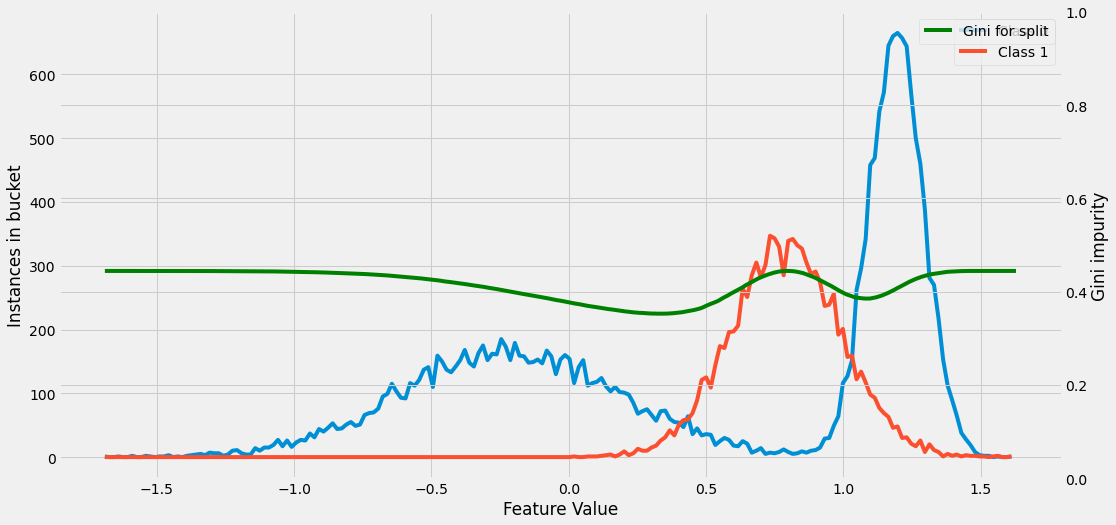

In [99]:
fig, ax1 = plt.subplots(figsize=(FIGSIZE))
ax2 = ax1.twinx()
for class_ in sorted(set(y)):
    hist, bin_edges = np.histogram(x[y == class_], bins=BINS)
    ax1.plot(bin_edges[:-1], hist, label=f"Class {class_:.0f}")
    
ax1.legend()
ax1.set_xlabel('Feature Value')
ax1.set_ylabel('Instances in bucket')




splits_bondary = np.linspace(min(x), max(x), 301)
splits_gini = [objective_functions.gini_impurity_split(x, y, bondary) for bondary in splits_bondary]
ax2.set_ylim(0, 1)
ax2.set_ylabel("Gini impurity")
ax2.plot(splits_bondary, splits_gini, color='green', label='Gini for split')
ax2.legend()


In [94]:
x_1.min()

0.033952108568665706

In [95]:
objective_functions.gini_impurity_split(x, y, 0)

0.3772017425788431

In [96]:
objective_functions.gini_impurity(y[x >= 0])

0.49134003201620824

In [97]:
sum(x < 0)

6969